<a href="https://colab.research.google.com/github/kamilarakhimova/hse-cvt/blob/main/Exercise3_FCN%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170498071/170498071 [00:01<00:00, 92689923.44it/s]


Extracting content/cifar-10-python.tar.gz to content
Files already downloaded and verified


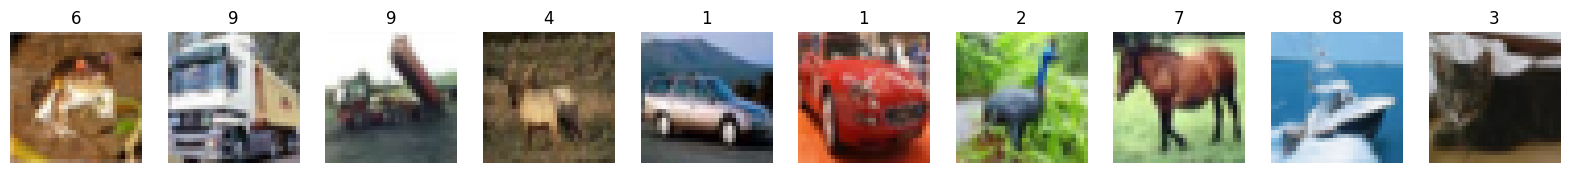

In [ ]:
# Load dataset in Pytorch dataset class

from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

trainset = datasets.CIFAR10("content", train=True,  download=True)
testset = datasets.CIFAR10("content", train = False, download=True)

# Display some samples
for j in range(10):
  image, class_num = trainset[j]
  plt.subplot(1, 10 ,j+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(str(class_num))

In [ ]:
# Validation function. Don't change it
def validate(model,testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  return correct / total

# 1. Multi layer perceptron

Implement CIFAR10 classifier using a fully connected neural network.



In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class TwoLayerFCN(nn.Module):

    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        # Define two or three layer fully - connected network with linear layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.GELU()

    def forward(self, x):
        # Preprocess input, remember that first dimension of x is batch dimension !

        # Perform forward pass;
        # Use layers defined in constructor;
        # Add activation function on your choice: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

        scores1 = self.fc1(x)  # Batch and bias processing inside
        activations1 = self.activation(scores1)  # activation ReLU
        scores2 = self.fc2(activations1)  # Linear
        activations2 = self.activation(scores2)

        # return raw output of last layer
        scores = activations2
        return scores


In [ ]:
# Prepare the data
transform=transforms.Compose([
                              transforms.ToTensor(), # Pil Image to Pytorch tensor
                              transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261)), # https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize
                              transforms.Lambda(lambda x: torch.flatten(x))# you can add some preprocessing here
                              ])

trainset.transform = transform
testset.transform = transform

train_loader = DataLoader(trainset, batch_size = 512, shuffle = True)
test_loader = DataLoader(testset, batch_size = 256, shuffle = False)



### Train your model

In [ ]:
import torch.optim as optim

# Train the model
# You may change loss function, learning rate and number of epochs

model = TwoLayerFCN(10)
model.train()

criterion = nn.CrossEntropyLoss()

# You can change learning rate number of epochs, and select the optimizer
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum=0.9) # Put your code here

best_accuracy = 0

for epoch in range(15):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)
        # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop

        optimizer.zero_grad()   # zero the gradient buffers
        loss.backward()
        optimizer.step()


    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    if best_accuracy < accuracy:
        best_accuracy = accuracy

print("Best accuracy is {:.2f}".format(best_accuracy))

Epoch 0 Loss 1.76 Accuracy 0.45
Epoch 1 Loss 1.50 Accuracy 0.48
Epoch 2 Loss 1.35 Accuracy 0.50
Epoch 3 Loss 1.32 Accuracy 0.51
Epoch 4 Loss 1.44 Accuracy 0.52
Epoch 5 Loss 1.27 Accuracy 0.52
Epoch 6 Loss 1.11 Accuracy 0.53
Epoch 7 Loss 1.12 Accuracy 0.53
Epoch 8 Loss 1.15 Accuracy 0.53
Epoch 9 Loss 1.07 Accuracy 0.54
Epoch 10 Loss 1.07 Accuracy 0.54
Epoch 11 Loss 1.02 Accuracy 0.55
Epoch 12 Loss 0.93 Accuracy 0.55
Epoch 13 Loss 0.86 Accuracy 0.54
Epoch 14 Loss 0.92 Accuracy 0.54
Best accuracy is 0.55


# 2. Compare different optimizators

* Take three different optimizers e.g.: SGD, SGD with momentum, AdamW.
* Train the model with each of them.
* Plot the loss curve for different optimizers in same axis



*Because this task is time consuming it is recommended to perform calculations on a small piece of dataset*

## SGD Optimizer

In [ ]:
import torch.optim as optim

model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01)

losses_SGD = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_SGD.append(loss.item())


Epoch 0 Loss 1.96 Accuracy 0.34
Epoch 1 Loss 1.82 Accuracy 0.38
Epoch 2 Loss 1.76 Accuracy 0.41
Epoch 3 Loss 1.67 Accuracy 0.42
Epoch 4 Loss 1.74 Accuracy 0.44
Epoch 5 Loss 1.60 Accuracy 0.44
Epoch 6 Loss 1.57 Accuracy 0.45
Epoch 7 Loss 1.56 Accuracy 0.45
Epoch 8 Loss 1.53 Accuracy 0.46
Epoch 9 Loss 1.58 Accuracy 0.46


In [ ]:
losses_SGD

[1.9572275876998901,
 1.8192089796066284,
 1.7609769105911255,
 1.6675519943237305,
 1.7440005540847778,
 1.6016006469726562,
 1.5651158094406128,
 1.5559595823287964,
 1.5347051620483398,
 1.5820811986923218]

## SGD with Momentum Optimizer

In [ ]:
import torch.optim as optim

model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_SGD_Momentum = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_SGD_Momentum.append(loss.item())


Epoch 0 Loss 1.63 Accuracy 0.45
Epoch 1 Loss 1.40 Accuracy 0.47
Epoch 2 Loss 1.39 Accuracy 0.49
Epoch 3 Loss 1.36 Accuracy 0.51
Epoch 4 Loss 1.25 Accuracy 0.52
Epoch 5 Loss 1.30 Accuracy 0.53
Epoch 6 Loss 1.33 Accuracy 0.53
Epoch 7 Loss 1.23 Accuracy 0.54
Epoch 8 Loss 1.08 Accuracy 0.53
Epoch 9 Loss 1.03 Accuracy 0.53


## Adam Optimizer

In [ ]:
import torch.optim as optim

model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.01)

losses_Adam = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_Adam.append(loss.item())


Epoch 0 Loss 2.30 Accuracy 0.10
Epoch 1 Loss 2.30 Accuracy 0.10
Epoch 2 Loss 2.30 Accuracy 0.10
Epoch 3 Loss 2.30 Accuracy 0.10
Epoch 4 Loss 2.30 Accuracy 0.10
Epoch 5 Loss 2.30 Accuracy 0.10
Epoch 6 Loss 2.30 Accuracy 0.10
Epoch 7 Loss 2.30 Accuracy 0.10
Epoch 8 Loss 2.30 Accuracy 0.10
Epoch 9 Loss 2.30 Accuracy 0.10


## Loss curves for different optimizers

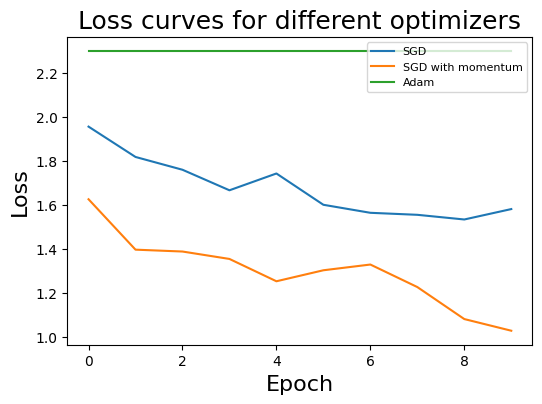

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,4))

plt.plot(losses_SGD, label='SGD')
plt.plot(losses_SGD_Momentum, label='SGD with momentum')
plt.plot(losses_Adam, label='Adam')

plt.legend(loc = 'upper right', prop = {'size': 8})

plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss curves for different optimizers', fontsize = 18)

plt.show()

# Ideas for extra work

* Compare different Activation functions ✅
* Use instruments like [Tensorboard](https://pytorch.org/docs/stable/tensorboard.html) or [WandB](https://wandb.ai/site) to log results ➕ ➖
* Use [Lightning](https://lightning.ai/) to implement train loop ✅

# Compare different Activation functions

## ReLU function

In [ ]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.ReLU()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_ReLU = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_ReLU.append(loss.item())


Epoch 0 Loss 1.60 Accuracy 0.45
Epoch 1 Loss 1.49 Accuracy 0.48
Epoch 2 Loss 1.43 Accuracy 0.50
Epoch 3 Loss 1.44 Accuracy 0.50
Epoch 4 Loss 1.26 Accuracy 0.51
Epoch 5 Loss 1.23 Accuracy 0.52
Epoch 6 Loss 1.22 Accuracy 0.52
Epoch 7 Loss 1.12 Accuracy 0.53
Epoch 8 Loss 1.10 Accuracy 0.53
Epoch 9 Loss 1.04 Accuracy 0.54


## Sigmoid function

In [ ]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_Sigmoid = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_Sigmoid.append(loss.item())


Epoch 0 Loss 2.17 Accuracy 0.30
Epoch 1 Loss 2.14 Accuracy 0.31
Epoch 2 Loss 2.10 Accuracy 0.33
Epoch 3 Loss 2.07 Accuracy 0.34
Epoch 4 Loss 2.05 Accuracy 0.34
Epoch 5 Loss 2.09 Accuracy 0.35
Epoch 6 Loss 2.06 Accuracy 0.35
Epoch 7 Loss 2.04 Accuracy 0.35
Epoch 8 Loss 2.02 Accuracy 0.36
Epoch 9 Loss 2.03 Accuracy 0.37


## Tanh function

In [ ]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.Tanh()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_Tanh = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_Tanh.append(loss.item())


Epoch 0 Loss 1.88 Accuracy 0.37
Epoch 1 Loss 1.81 Accuracy 0.39
Epoch 2 Loss 1.83 Accuracy 0.40
Epoch 3 Loss 1.84 Accuracy 0.41
Epoch 4 Loss 1.82 Accuracy 0.42
Epoch 5 Loss 1.76 Accuracy 0.42
Epoch 6 Loss 1.63 Accuracy 0.43
Epoch 7 Loss 1.73 Accuracy 0.43
Epoch 8 Loss 1.70 Accuracy 0.44
Epoch 9 Loss 1.65 Accuracy 0.44


## LeakyReLU function

In [ ]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.LeakyReLU()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_LeakyReLU = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_LeakyReLU.append(loss.item())


Epoch 0 Loss 1.69 Accuracy 0.45
Epoch 1 Loss 1.54 Accuracy 0.48
Epoch 2 Loss 1.44 Accuracy 0.50
Epoch 3 Loss 1.39 Accuracy 0.51
Epoch 4 Loss 1.32 Accuracy 0.52
Epoch 5 Loss 1.27 Accuracy 0.52
Epoch 6 Loss 1.19 Accuracy 0.52
Epoch 7 Loss 1.07 Accuracy 0.53
Epoch 8 Loss 1.17 Accuracy 0.53
Epoch 9 Loss 1.15 Accuracy 0.53


## ELU function

In [ ]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.ELU()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_ELU = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_ELU.append(loss.item())


Epoch 0 Loss 1.67 Accuracy 0.42
Epoch 1 Loss 1.67 Accuracy 0.45
Epoch 2 Loss 1.55 Accuracy 0.46
Epoch 3 Loss 1.54 Accuracy 0.48
Epoch 4 Loss 1.46 Accuracy 0.49
Epoch 5 Loss 1.45 Accuracy 0.49
Epoch 6 Loss 1.26 Accuracy 0.50
Epoch 7 Loss 1.32 Accuracy 0.50
Epoch 8 Loss 1.35 Accuracy 0.50
Epoch 9 Loss 1.23 Accuracy 0.49


## Softplus function

In [ ]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.Softplus()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_Softplus = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_Softplus.append(loss.item())


Epoch 0 Loss 1.85 Accuracy 0.40
Epoch 1 Loss 1.56 Accuracy 0.41
Epoch 2 Loss 1.54 Accuracy 0.44
Epoch 3 Loss 1.52 Accuracy 0.45
Epoch 4 Loss 1.55 Accuracy 0.48
Epoch 5 Loss 1.53 Accuracy 0.49
Epoch 6 Loss 1.39 Accuracy 0.49
Epoch 7 Loss 1.45 Accuracy 0.49
Epoch 8 Loss 1.31 Accuracy 0.50
Epoch 9 Loss 1.24 Accuracy 0.50


## GELU function

In [147]:
class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.activation = nn.GELU()

    def forward(self, x):
        scores1 = self.fc1(x)
        activations1 = self.activation(scores1)
        scores2 = self.fc2(activations1)
        activations2 = self.activation(scores2)

        scores = activations2
        return scores


model = TwoLayerFCN(5)
model.train()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

losses_GELU = []

for epoch in range(10):
    for img_batch, labels_batch in train_loader:
        output = model(img_batch)
        loss = criterion(output, labels_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    accuracy = validate(model,test_loader)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

    losses_GELU.append(loss.item())


Epoch 0 Loss 1.67 Accuracy 0.44
Epoch 1 Loss 1.53 Accuracy 0.48
Epoch 2 Loss 1.44 Accuracy 0.50
Epoch 3 Loss 1.40 Accuracy 0.51
Epoch 4 Loss 1.35 Accuracy 0.52
Epoch 5 Loss 1.17 Accuracy 0.52
Epoch 6 Loss 1.17 Accuracy 0.53
Epoch 7 Loss 1.15 Accuracy 0.52
Epoch 8 Loss 1.02 Accuracy 0.53
Epoch 9 Loss 1.03 Accuracy 0.54


## Loss curves for different activation functions

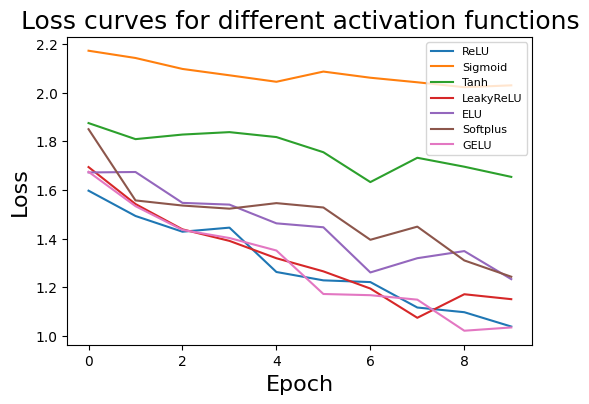

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,4))

plt.plot(losses_ReLU, label='ReLU')
plt.plot(losses_Sigmoid, label='Sigmoid')
plt.plot(losses_Tanh, label='Tanh')
plt.plot(losses_LeakyReLU, label='LeakyReLU')
plt.plot(losses_ELU, label='ELU')
plt.plot(losses_Softplus, label='Softplus')
plt.plot(losses_GELU, label='GELU')

plt.legend(loc = 'upper right', prop = {'size': 8})

plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss curves for different activation functions', fontsize = 18)

plt.show()

# Use WandB to log results

**Answer:** *Tried to realise it, but had problems with downloading. So, you can see below the code with commented WandbLogger that could work if my Jupyter Notebook wanted to see already downloaded library....*

# Use Lightning to implement train loop

Источник: https://www.geeksforgeeks.org/training-neural-networks-using-pytorch-lightning/

In [180]:
!pip install pytorch-lightning

In [189]:
!pip3 install wandb

In [204]:
import torch.nn as nn
import pytorch_lightning as pl
import torch.nn.functional as F
from torch.optim import SGD
import wandb
from pytorch_lightning.loggers import WandbLogger

# wandb_logger = WandbLogger(log_model="all")

class model(pl.LightningModule):
    def __init__(self):
        super(model, self).__init__()
        self.fc1 = nn.Linear(3072, 1000, bias = True)
        self.fc2 = nn.Linear(1000, 10, bias = True)
        self.lr = 0.01
        self.loss = nn.CrossEntropyLoss()
        self.activation = nn.ReLU()
        self.momentum = 0.9

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return x

    def configure_optimizers(self):
       return SGD(self.parameters(),lr = self.lr, momentum=self.momentum)

    def training_step(self, train_batch, batch_idx):
        x, y = train_batch
        logits = self.forward(x)
        loss = self.loss(logits,y)
        return loss

    def validation_step(self, valid_batch, batch_idx):
        x, y = valid_batch
        logits = self.forward(x)
        loss = self.loss(logits,y)

In [205]:
import pytorch_lightning as pl
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

class Data(pl.LightningDataModule):
    def prepare_data(self):
        transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261)),
                              transforms.Lambda(lambda x: torch.flatten(x))
                              ])

        self.train_data = datasets.CIFAR10("content", train=True,  download=True, transform=transform)
        self.test_data = datasets.CIFAR10("content", train = False, download=True, transform=transform)

    def train_dataloader(self):
        return DataLoader(self.train_data, batch_size= 512, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_data, batch_size= 256, shuffle=False)

In [208]:
clf = model()

cifar = Data()

#wandb_logger = WandbLogger(log_model="all")

trainer = pl.Trainer(accelerator='cpu', max_epochs=15) #, logger=wandb_logger)
trainer.fit(clf, cifar)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | fc1        | Linear           | 3.1 M 
1 | fc2        | Linear           | 10.0 K
2 | loss       | CrossEntropyLoss | 0     
3 | activation | ReLU             | 0     
------------------------------------------------
3.1 M     Trainable params
0         Non-trainable params
3.1 M     Total params
12.332    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.
